In [4]:
from prediction_data import PredictionData
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = PredictionData('2019.csv')


The World Happiness Report is an annual survey that collects subjective well being survey data from over 156 countries with the goal of quantifying different levels of happiness across countries and the features that give rise to those subjective assessments. My data is from their 2019 report.

There are seven key features within the data set:  
1. Score: The average happiness rating of a country by asking respondents "how happy are you from 1 - 10". This is the dependent variable for my data.
2. GDP per capita: The countries GDP per capita.
3. Generosity: Averaging the question "Have you donated money to a charity in the past month" by GDP per capita
4. Freedom: Averaging over all respondents the question, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
5. Social Support: binary responses (either 0 or 1) to the question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
6. Life Expectancy: Using WHO data to calculate life expectancy for a country. 
7. Perceptions of Corruption: binary answers to two questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”.  

The target variable is the Happiness Score (dependent variable).  

My background is in social science/economics so I can appreciate the amount of work and time that goes into making a rigorous, standardized survey that has lasted over 9 years. What makes the data interesting to me is that I am interested in how countries vary by their subjective assessments of happiness and what variables influence that rating the most. I enjoy being happy and I would like others to feel the same way, by finding out what makes people happier we can then adjust public international policies to focus on those aspects. Moreover, the features are certainly good predictors of the target because they are well agreed upon measures that influence happiness. And the fact that the survey is done in a methodological fashion makes these predictors the most reliable out of any in the literature for predicting happiness across countries.


### 2.1 Plot the prediction data

Load your data into a NumPy array and create a scatter plot that shows the relationship between one feature of your data set and the target. Your plot should be clearly labeled.


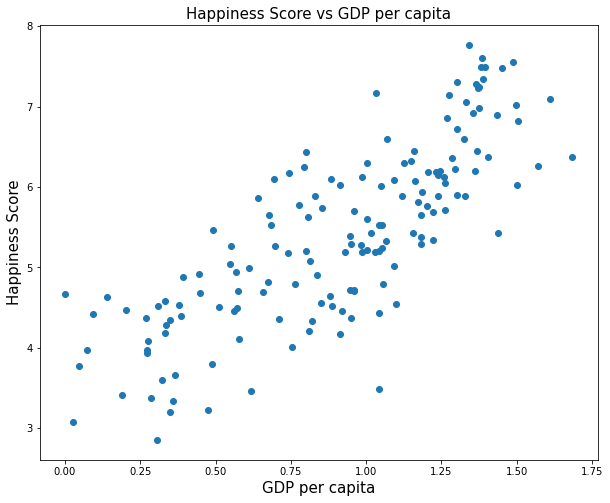

In [6]:
plt.figure(figsize=(10, 8))
plt.xlabel('GDP per capita', fontsize=15)
plt.ylabel('Happiness Score', fontsize=15)
plt.title('Happiness Score vs GDP per capita', fontsize=15)
plt.scatter(df.gdp_pc, df.score)


Not surprisingly, there is a postive trend between GDP per capita and Happiness score. This finding is intuitive and is backed by the evidence as seen in this graph. Wealthier countries have more freedom, longer lives, more freetime, higher education, and so on. The platitude "money doesn't bring you happiness," isn't exactly true when you see the positive trend in this graph.  

### 2.2 Standardize the data

In [7]:
df.standardize()


### 2.3 Find the best model

In [8]:
# Social Support
y_hat_ss = df.find_best_feature(df.social_support)

# Generosity
y_hat_gen = df.find_best_feature(df.generosity)

# Life Expectancy
y_hat_life_exp = df.find_best_feature(df.life_exp)

# Freedom
y_hat_free = df.find_best_feature(df.freedom)

# GDP per capita
y_hat_gdp = df.find_best_feature(df.gdp_pc)

# Corruption
y_hat_corrup = df.find_best_feature(df.corruption)


The Sum of Squared Residuals for Social Support is 61.804266265449954
The Sum of Squared Residuals for Social Support is 155.10311969741483
The Sum of Squared Residuals for Social Support is 61.11803467028546
The Sum of Squared Residuals for Social Support is 105.89337766481327
The Sum of Squared Residuals for Social Support is 57.68099876597751
The Sum of Squared Residuals for Social Support is 132.80319929400014


Based on these outputs, the best feature is GDP per capita shortly followed by Life Expectancy. Surprisingly, Generosity has the weakest relationship. 

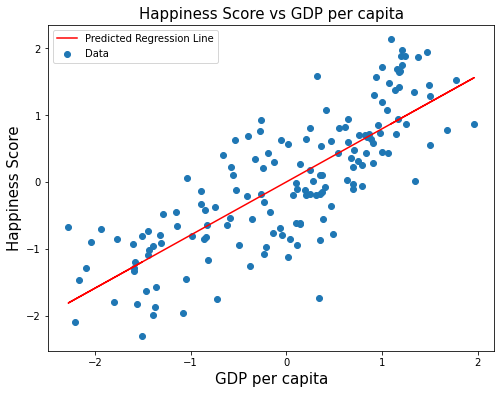

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel('GDP per capita', fontsize=15)
plt.ylabel('Happiness Score', fontsize=15)
plt.title('Happiness Score vs GDP per capita', fontsize=15)
plt.scatter(df.gdp_pc, df.score, label='Data')
plt.plot(df.gdp_pc, y_hat_gdp, label='Predicted Regression Line', color='r')
plt.legend()


A well fitted line across the different countries. Nothing too surprising here.

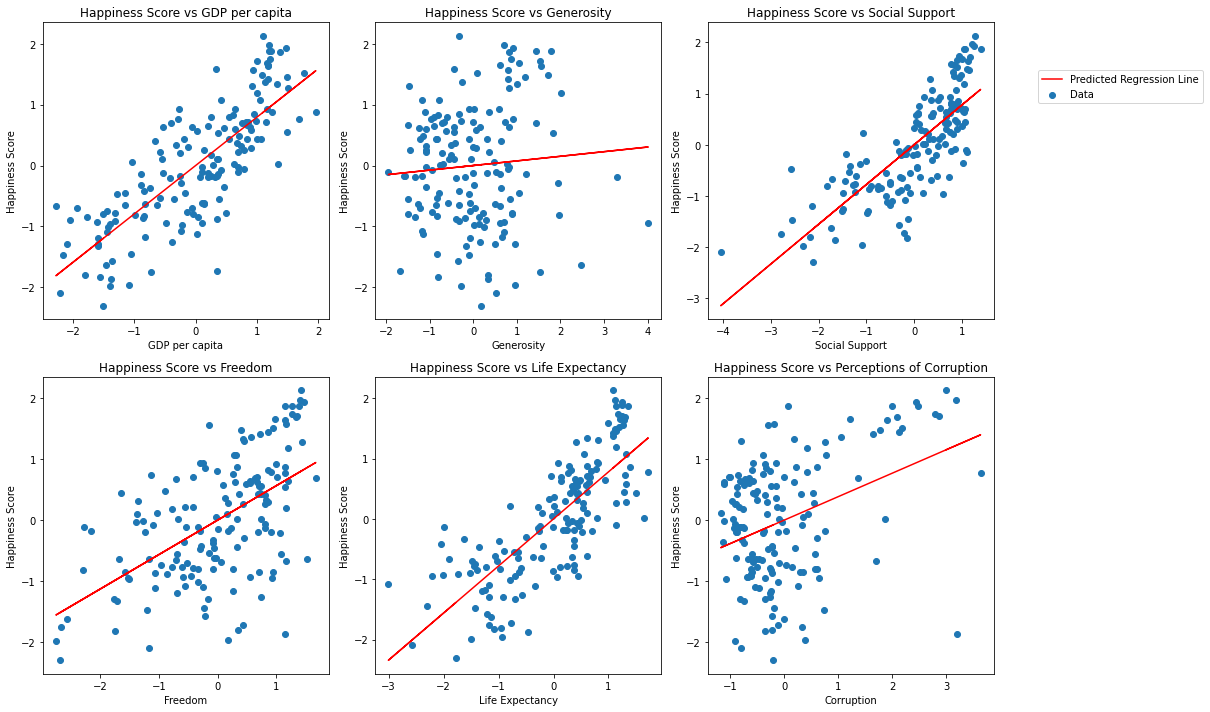

In [10]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(
    2, 3, sharey=False, figsize=(14, 10))

ax1.set_title('Happiness Score vs GDP per capita')
ax1.scatter(df.gdp_pc, df.score, label='Data')
ax1.plot(df.gdp_pc, y_hat_gdp, label='Predicted Regression Line', color='r')
ax1.set_xlabel("GDP per capita")
ax1.set_ylabel("Happiness Score")

ax2.set_title('Happiness Score vs Generosity')
ax2.scatter(df.generosity, df.score, label='Data')
ax2.plot(df.generosity, y_hat_gen, label='Predicted Regression Line', color='r')
ax2.set_xlabel("Generosity")
ax2.set_ylabel("Happiness Score")

ax3.set_title('Happiness Score vs Social Support')
ax3.scatter(df.social_support, df.score, label='Data')
ax3.plot(df.social_support, y_hat_ss,
         label='Predicted Regression Line', color='r')
ax3.set_xlabel("Social Support")
ax3.set_ylabel("Happiness Score")

ax4.set_title('Happiness Score vs Freedom')
ax4.scatter(df.freedom, df.score, label='Data')
ax4.plot(df.freedom, y_hat_free, label='Predicted Regression Line', color='r')
ax4.set_xlabel("Freedom")
ax4.set_ylabel("Happiness Score")

ax5.set_title('Happiness Score vs Life Expectancy')
ax5.scatter(df.life_exp, df.score, label='Data')
ax5.plot(df.life_exp, y_hat_life_exp,
         label='Predicted Regression Line', color='r')
ax5.set_xlabel("Life Expectancy")
ax5.set_ylabel("Happiness Score")

ax6.set_title('Happiness Score vs Perceptions of Corruption')
ax6.scatter(df.corruption, df.score, label='Data')
ax6.plot(df.corruption, y_hat_corrup,
         label='Predicted Regression Line', color='r')
ax6.set_xlabel("Corruption")
ax6.set_ylabel("Happiness Score")

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.75, 2.05))


Every feature shows at least a slight correlation with the Happiness Score (with the exception of Generosity). However, clearly the strongest correlations are with Life Expectancy, Social Support, and GDP per capita. This makes sense since these three features are very important for subjective happiness. But because they are also highly correlated with each other it isn't clear which feature by itself matters the most. If there were countries that had high GDP per capita but low life expectancy, they could be used as test cases to find out the causal relationship. Nevertheless, the best model does make sense intuitively since GDP per capita does come first before life expectancy and social support. You can't build good medical infrastructure without money and you can't have a wide social safety net without a high GDP income. 

### Bonus Question

**How have the predictors of happiness changed since Covid?**  

To investigate this question I will use the new 2021 World Happiness Report which uses the same metrics as the 2019 report. The only differences are that the log of GDP per capita is taken and life expectancy is taken as the actual age. However, these changes won't influence the SSR comparisons from 2019 to 2021.  

I will estimate the model fit using least squared regression and test to see if some features fit better or worse compared to their 2019 estimates.

In [11]:
df2021 = PredictionData('2021.csv')
df2021.standardize()


In [12]:
# Social Support
betas, R = df.lstsq_model(df.social_support)
betas, R2021 = df2021.lstsq_model(df2021.social_support)
print(f'The Sum of Squared Residuals for 2019 Social Support is {R}')
print(f'The Sum of Squared Residuals for 2021 Social Support is {R2021}')
print()
# Generosity
betas, R = df.lstsq_model(df.generosity)
betas, R2021 = df2021.lstsq_model(df2021.generosity)
print(f'The Sum of Squared Residuals for 2019 Generosity is {R}')
print(f'The Sum of Squared Residuals for 2021 Generosity is {R2021}')
print()
# Life Expectancy
betas, R = df.lstsq_model(df.life_exp)
betas, R2021 = df2021.lstsq_model(df2021.life_exp)
print(f'The Sum of Squared Residuals for 2019 Life Expectancy is {R}')
print(f'The Sum of Squared Residuals for 2021 Life Expectancy is {R2021}')
print()
# Freedom
betas, R = df.lstsq_model(df.freedom)
betas, R2021 = df2021.lstsq_model(df2021.freedom)
y_hat_free_2021 = betas['B0'] + betas['B1'] * df2021.freedom
print(f'The Sum of Squared Residuals for 2019 Freedom is {R}')
print(f'The Sum of Squared Residuals for 2021 Freedom is {R2021}')
print()
# GDP per capita
betas, R = df.lstsq_model(df.gdp_pc)
betas, R2021 = df2021.lstsq_model(df2021.gdp_pc)
print(f'The Sum of Squared Residuals for 2019 GDP per capita is {R}')
print(f'The Sum of Squared Residuals for 2021 GDP per capita is {R2021}')
print()
# Corruption
betas, R = df.lstsq_model(df.corruption)
betas, R2021 = df2021.lstsq_model(df2021.corruption)
print(f'The Sum of Squared Residuals for 2019 Corruption is {R}')
print(f'The Sum of Squared Residuals for 2021 Corruption is {R2021}')


The Sum of Squared Residuals for 2019 Social Support is 61.804266265449954
The Sum of Squared Residuals for 2021 Social Support is 63.6410427521184

The Sum of Squared Residuals for 2019 Generosity is 155.10311969741483
The Sum of Squared Residuals for 2021 Generosity is 148.95279467541366

The Sum of Squared Residuals for 2019 Life Expectancy is 61.11803467028546
The Sum of Squared Residuals for 2021 Life Expectancy is 61.09346085466865

The Sum of Squared Residuals for 2019 Freedom is 105.89337766481327
The Sum of Squared Residuals for 2021 Freedom is 93.96479546630775

The Sum of Squared Residuals for 2019 GDP per capita is 57.68099876597751
The Sum of Squared Residuals for 2021 GDP per capita is 56.065663643521525

The Sum of Squared Residuals for 2019 Corruption is 132.80319929400014
The Sum of Squared Residuals for 2021 Corruption is 122.57352436890747


These results show some interesting developments with what features can account for happiness. As I would have guessed, perception of corruption matter more for happiness after covid because there were so many conspiracies and anxieties surrounding world actors and the different motives harbored by international and local governments. Another interesting change is that Freedom to make life choices changed the most, having a more linear fit with happiness. Covid lockdowns may have given people a new outlook on how important it is to be able to move around, and different restrictions have made people less or more happy. The assumption here is that a lower SSR means that there is a tighter relationship between the feature and the happiness score.

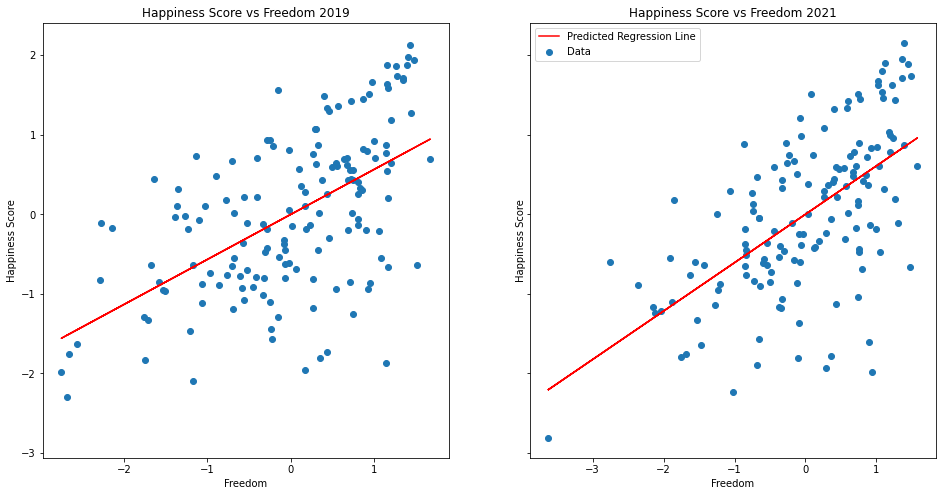

In [13]:
fig, ([ax1, ax2]) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
ax1.set_title('Happiness Score vs Freedom 2019')
ax1.scatter(df.freedom, df.score, label='Data')
ax1.plot(df.freedom, y_hat_free, label='Predicted Regression Line', color='r')
ax1.set_xlabel("Freedom")
ax1.set_ylabel("Happiness Score")

ax2.set_title('Happiness Score vs Freedom 2021')
ax2.scatter(df2021.freedom, df2021.score, label='Data')
ax2.plot(df2021.freedom, y_hat_free_2021,
         label='Predicted Regression Line', color='r')
ax2.set_xlabel("Freedom")
ax2.set_ylabel("Happiness Score")
plt.legend()


With this visualization you can see a subtle difference in the correlation between Freedom and Happiness, with the 2021 values having a higher correlation. It may not not seem large, but at a population level across 150 countries, a small change is a large qualitative. Also, the steeper slope from the 2021 data indicates that a one unit increase in freedom leads to a larger increase in happiness score (compared to the 2019 slope).